In [1]:
import time 
import datetime
import os
from pathlib import Path
import torch
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TOKENIZERS_PARALLELISM"] = "False"

In [3]:
# from transformers import RobertaTokenizerFast

# tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)

In [4]:
# checkpoints = [str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") ]#if (int(str(x).split("-")[-1]) % 10000) == 0]#if (int(str(x).split("-")[-1] % 1000)) == 0]
# checkpoints = checkpoints[0:3]

In [5]:
# from transformers import RobertaConfig
# from transformers import RobertaForMaskedLM


# config = RobertaConfig.from_pretrained(checkpoints[0])
# model = RobertaForMaskedLM(config=config)
# model

In [6]:
# from transformers import pipeline


In [7]:
# [pipeline(
#     "fill-mask",
#     model=checkpoint,
#     tokenizer=tokenizer
# )("The sky is <mask>.")[0]["sequence"]
# for checkpoint in checkpoints]

In [8]:
# from transformers import DataCollatorForLanguageModeling

# data_collator = DataCollatorForLanguageModeling(
#     tokenizer=tokenizer, mlm=True, mlm_probability=0.15
# )

In [9]:
# from datasets import load_dataset
# dataset = load_dataset("text", data_dir="/data/loriss21dm/babylm/train_100M/")
# dataset.set_transform(lambda x : tokenizer(x["text"], return_special_tokens_mask=True, truncation=True, max_length=512))

In [10]:
# torch.nn.utils.rnn.pad_sequence([torch.tensor(x) for x in dataset["train"][0:10]["input_ids"]], batch_first=True, padding_value=1)

In [11]:
# data_collator.torch_mask_tokens(torch.nn.utils.rnn.pad_sequence([torch.tensor(x) for x in dataset["train"][0:10]["input_ids"]], batch_first=True, padding_value=1))

In [12]:
# torch.tensor(dataset["train"][0]["input_ids"]).unsqueeze(dim=0)

In [13]:
# data_collator((torch.tensor(dataset["train"][0]["input_ids"]),))

In [14]:
# def get_loss(model, logits, labels):
#     shift_logits = logits[..., :-1, :].contiguous()
#     shift_labels = labels[..., 1:].contiguous()
#     loss_fct = torch.nn.CrossEntropyLoss()
#     shift_logits = shift_logits.view(-1, shift_logits.shape[-1])
#     shift_labels = shift_labels.view(-1)
#     # Enable model parallelism
#     shift_labels = shift_labels.to(shift_logits.device)
#     loss = loss_fct(shift_logits, shift_labels)
    
#     return loss

In [15]:
# def get_loss(model, logits, labels):
#     print(logits)
#     print(labels)
#     loss_fct = CrossEntropyLoss()
#     masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size), labels.view(-1))

In [16]:
device="cuda"

In [17]:
# def get_loss_gradient(model, example):
#     model.train()
#     model.zero_grad()
#     # input_ids, attention_mask = tokenizer([example], return_tensors='pt', return_token_type_ids=False,padding='max_length', truncation=True, max_length=512).values()
#     input_ids, labels = data_collator((torch.tensor(dataset["train"][0]["input_ids"]),)).values() # TODO make static maybe probably
#     #print("labels",labels)
#    # print(input_ids.shape)
#     # print(attention_mask)
#     inputs_embeds=model.get_input_embeddings().weight[input_ids].to(device)
#    # attention_mask = attention_mask
#    # print(inputs_embeds.reshape(1,-1,2048).shape)

#     inputs_embeds.retain_grad()

#     outputs = model.forward(
#        #     input_ids=input_ids,
#             inputs_embeds=inputs_embeds,
#            # attention_mask=attention_mask,
#             labels=labels.to(device)
#        #     attention_bias=attention_bias,
#        #     past_key_values=past_key_values,
#        #     use_cache=use_cache,
#         #    output_hidden_states=output_hidden_states,
#         )
#     #print("o", outputs)
#     loss = outputs.loss
#     loss.retain_grad()
#    # print(torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].shape)
#     return  torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].squeeze()



In [18]:
    # def pw_influence_at_cp(model, test_example, train_examples): 
    #     return (get_loss_gradient(model, test_example) * torch.stack([get_loss_gradient(model, train_example) for train_example in tqdm(train_examples,desc="Documents", leave=False)])).sum(1).sum(1)

In [19]:
# from tqdm import tqdm

In [20]:
# len(dataset["train"])

In [21]:
# training_examples = dataset["train"][0:100] # this tokenizes


In [22]:
# N_MODELS_PARRALEL = 4

In [23]:
# checkpoints

In [24]:
# feqwafdsvyccheckpoints13refd

In [25]:
# from transformers import RobertaConfig
# from transformers import RobertaForMaskedLM
# def get_for_checkpoint(checkpoint_path,training_examples,device):
    
#     print(checkpoint_path, flush = True)
#     config = RobertaConfig.from_pretrained(checkpoint_path)
#     model = RobertaForMaskedLM(config=config).to(device)

#     return [get_loss_gradient(model, example) for example in training_examples["input_ids"]]

    


In [26]:
# get_for_checkpoint([(checkpoint, training_examples, device) for checkpoint in checkpoints][0])

In [27]:
!mkdir results

mkdir: cannot create directory ‘results’: File exists


In [28]:
# %%writefile get_for_checkpoint.py
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TOKENIZERS_PARALLELISM"] = "False"
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
from transformers import RobertaConfig,AutoConfig
from transformers import RobertaForMaskedLM
import torch

from transformers import RobertaTokenizerFast
from transformers import DataCollatorForLanguageModeling
tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)



def get_loss_gradient(model, example,device):
    model.train()
    model.zero_grad()
    

    # input_ids, attention_mask = tokenizer([example], return_tensors='pt', return_token_type_ids=False,padding='max_length', truncation=True, max_length=512).values()
    input_ids, labels = data_collator((torch.tensor(example),)).values() # TODO make static maybe probably
 #   print(input_ids)
    #print("labels",labels)
   # print(input_ids.shape)
    # print(attention_mask)
    inputs_embeds=model.get_input_embeddings().weight[input_ids].to(device)
   # attention_mask = attention_mask
   # print(inputs_embeds.reshape(1,-1,2048).shape)

    inputs_embeds.retain_grad()

    outputs = model.forward(
       #     input_ids=input_ids,
            inputs_embeds=inputs_embeds,
           # attention_mask=attention_mask,
            labels=labels.to(device)
       #     attention_bias=attention_bias,
       #     past_key_values=past_key_values,
       #     use_cache=use_cache,
        #    output_hidden_states=output_hidden_states,
        )
    #print("o", outputs)
    loss = outputs.loss
    loss.retain_grad()
   # print(torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].shape)
    return  torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].squeeze().cpu()

def get_for_checkpoint(checkpoint_path, training_examples, queue):
    try:

        device = "cuda:" + str(queue.get())
        # print( device, flush=True)
        print("loading to", device,flush=True)
        config = AutoConfig.from_pretrained(checkpoint_path)
        model = RobertaForMaskedLM(config=config).to(device)
        print("loaded to", device,flush=True)
    #
      #  del tokenizer
      #  del data_collator

        gradients = [get_loss_gradient(model, example,device) for example in training_examples["input_ids"]]
        print("saving to ","./results/"+(checkpoint_path.split("-")[-1]), flush=True)
        torch.save( gradients, "./results/"+(checkpoint_path.split("-")[-1]))
        #return (checkpoint_path,gradients)
    except Exception as e:
        print(e,flush=True)

       

/data/loriss21dm/TracInVenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-07 06:11:32.257185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 06:11:32.275195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 06:11:32.294475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 06:11:32.300

In [29]:
# from multiprocessing import Pool, current_process, Queue
# import time 
# import datetime
# import os
# from pathlib import Path
# import torch
# from itertools import cycle
# os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'

# PROCCESSES = 2

# from get_for_checkpoint import get_for_checkpoint
# # def get_for_checkpoint(args):
# #     checkpoint_path, training_examples, device = args
# #     gpu_id = queue.get()
# #     try:
# #         # run processing on GPU <gpu_id>
# #         ident = current_process().ident
# #         print('{}: starting process on GPU {}'.format(ident, gpu_id),flush=True)
# #         config = RobertaConfig.from_pretrained(checkpoint_path)
# #         model = RobertaForMaskedLM(config=config).to("cuda:"+gpu_id if device == "cuda" else "cpu")
# #         print('{}: finished'.format(ident), flush=True)
# #         return[] #return [get_loss_gradient(model, example) for example in training_examples["input_ids"]]
# #     except:
# #         print("eee")
# #     finally:
# #         queue.put(gpu_id)

# #     # print(checkpoint_path, flush = True)
# #     # config = RobertaConfig.from_pretrained(checkpoint_path)
# #     # model = RobertaForMaskedLM(config=config).to(device)

# #     # return [get_loss_gradient(model, example) for example in training_examples["input_ids"]]

# # queue = []

# # # initialize the queue with the GPU ids
# # for gpu_id in range(NUM_GPUS):
# #     for _ in range(PROC_PER_GPU):
# #         queue.append(gpu_id)

# # get_for_checkpoint([(checkpoint, training_examples,  "cuda:"+str(queue.get())) for checkpoint in checkpoints][0])   
# # print(queue)
# from transformers import RobertaTokenizerFast

# tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)

# checkpoints = [str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") ]#if (int(str(x).split("-")[-1]) % 10000) == 0]#if (int(str(x).split("-")[-1] % 1000)) == 0]
# checkpoints = checkpoints[0:3]
# from transformers import DataCollatorForLanguageModeling

# data_collator = DataCollatorForLanguageModeling(
#     tokenizer=tokenizer, mlm=True, mlm_probability=0.15
# )
# from datasets import load_dataset
# dataset = load_dataset("text", data_dir="/data/loriss21dm/babylm/train_100M/")
# dataset.set_transform(lambda x : tokenizer(x["text"], return_special_tokens_mask=True, truncation=True, max_length=512))

# training_examples = dataset["train"][0:100]
# pool = Pool(processes=PROCCESSES)

# for result in pool.starmap(get_for_checkpoint, [(checkpoint, training_examples,gpu_id) for checkpoint, gpu_id in zip(checkpoints, cycle([0,1]))][0:2] ):
#     print(result)
# pool.close()
# pool.join()
# result

In [30]:
len([str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") if (int(str(x).split("-")[-1]) % 10000) == 0])

18

In [31]:
%%writefile run.py
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TOKENIZERS_PARALLELISM"] = "False"
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
from transformers import RobertaConfig,AutoConfig
from transformers import RobertaForMaskedLM
import torch

from transformers import RobertaTokenizerFast
from transformers import DataCollatorForLanguageModeling
tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)



def get_loss_gradient(model, example,device):
    model.train()
    model.zero_grad()
    

    # input_ids, attention_mask = tokenizer([example], return_tensors='pt', return_token_type_ids=False,padding='max_length', truncation=True, max_length=512).values()
    input_ids, labels = data_collator((torch.tensor(example),)).values() # TODO make static maybe probably
 #   print(input_ids)
    #print("labels",labels)
   # print(input_ids.shape)
    # print(attention_mask)
    inputs_embeds=model.get_input_embeddings().weight[input_ids].to(device)
   # attention_mask = attention_mask
   # print(inputs_embeds.reshape(1,-1,2048).shape)

    inputs_embeds.retain_grad()

    outputs = model.forward(
       #     input_ids=input_ids,
            inputs_embeds=inputs_embeds,
           # attention_mask=attention_mask,
            labels=labels.to(device)
       #     attention_bias=attention_bias,
       #     past_key_values=past_key_values,
       #     use_cache=use_cache,
        #    output_hidden_states=output_hidden_states,
        )
    #print("o", outputs)
    loss = outputs.loss
    loss.retain_grad()
   # print(torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].shape)
    return  torch.autograd.grad(loss, inputs_embeds, retain_graph=True)[0].squeeze()#.cpu()

def get_for_checkpoint(checkpoint_path, training_examples):
    try:
        gpu_id = queue.get()
        device = "cuda:" + str(gpu_id)
        # print( device, flush=True)
        print("loading to", device,flush=True)
        config = AutoConfig.from_pretrained(checkpoint_path)
        model = RobertaForMaskedLM(config=config).to(device)
        print("loaded to", device,flush=True)
    #
      #  del tokenizer
      #  del data_collator

        gradients = [get_loss_gradient(model, example,device) for example in training_examples["input_ids"]]
        print("saving to ","./results/"+(checkpoint_path.split("-")[-1]), flush=True)
        torch.save( gradients, "./results/"+(checkpoint_path.split("-")[-1]))
        queue.put(gpu_id)
        #return (checkpoint_path,gradients)
    except Exception as e:
        print(e,flush=True)
###############
from multiprocessing import Pool, current_process, Queue
import time 
import datetime
import os
from pathlib import Path
import torch
from itertools import cycle
os.environ['HF_HOME'] = '/data/loriss21dm/hfcache'
# # import multiprocessing as mp
# # mp.set_start_method('spawn', force=True)

PROCCESSES = 12
NUM_GPUS = 2
# # mp.set_start_method("fork", force=True)
# from get_for_checkpoint import get_for_checkpoint

from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained("TODO", max_len=512)

checkpoints = [str(x) for x in Path("/data/loriss21dm/babylm/TODO/").glob("checkpoint-*") if (int(str(x).split("-")[-1]) % 10000) == 0]#if (int(str(x).split("-")[-1] % 1000)) == 0]
checkpoints = checkpoints[0:12]
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)
from datasets import load_dataset
dataset = load_dataset("text", data_dir="/data/loriss21dm/babylm/train_100M/")
dataset.set_transform(lambda x : tokenizer(x["text"], return_special_tokens_mask=True, truncation=True, padding="max_length", max_length=512))

training_examples = dataset["train"][0:10000]
# pool = Pool(processes=PROCCESSES)
# print([(checkpoint,gpu_id) for checkpoint, gpu_id in zip(checkpoints, cycle([0,1]))])

queue = Queue()
NUM_GPUS = 2
for _ in range(PROCCESSES//NUM_GPUS):
    for i in range(NUM_GPUS):
        queue.put(i)
print(queue)
# pool.starmap(get_for_checkpoint, [(checkpoint, training_examples,queue) for checkpoint, gpu_id in zip(checkpoints, cycle([0,1]))] )
   
# pool.close()
# pool.join()
from multiprocessing import Pool

# def f(x):
#     return x*x

if __name__ == '__main__':
    with Pool(PROCCESSES) as p:
        print(p.starmap(get_for_checkpoint, [(checkpoint, training_examples) for checkpoint in checkpoints] ))
# pickle.dump( result, open( "./results/"+(path.split("-")[-1]), "wb" ) )

Overwriting run.py


In [ ]:
%run run.py

loading to cuda:0
loading to cuda:1
loading to cuda:0
loading to cuda:1
loading to cuda:0
loading to cuda:1
loading to cuda:0
loading to cuda:1
loading to cuda:0
loading to cuda:1
loading to cuda:0
loading to cuda:1
loaded to cuda:1
loaded to cuda:0
loaded to cuda:0
loaded to cuda:0
loaded to cuda:1
loaded to cuda:1
loaded to cuda:1
loaded to cuda:0
loaded to cuda:1
loaded to cuda:0
loaded to cuda:1
loaded to cuda:0


In [32]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [33]:
import pickle 
import os




gradients_at_checkpoints = sorted([(int(checkpoint_name), torch.load(os.path.join("./results", checkpoint_name),weights_only=True,map_location="cpu")) for checkpoint_name in os.listdir('./results')], key=lambda t : t[0])


In [34]:
checkpoint_number, gradients_sorted = zip(*gradients_at_checkpoints)

In [35]:
t =torch.stack([torch.stack(gradients) for gradients in gradients_sorted])
t.shape

torch.Size([14, 1000, 512, 768])

In [36]:
t_flat = t.flatten(-2,-1)
t_flat.shape

torch.Size([14, 1000, 393216])

In [37]:
t.sum(0).shape

torch.Size([1000, 512, 768])

In [38]:
torch.bmm(t_flat, torch.transpose(t_flat, 1,2)).mean(1)

tensor([[0.1618, 0.0000, 0.0000,  ..., 0.0715, 0.3173, 0.0880],
        [0.1690, 0.0000, 0.0000,  ..., 0.1001, 0.2594, 0.0535],
        [0.0686, 0.0000, 0.0000,  ..., 0.0102, 0.1296, 0.0363],
        ...,
        [0.1404, 0.0000, 0.0000,  ..., 0.0995, 0.3015, 0.0896],
        [0.1768, 0.0000, 0.0000,  ..., 0.0623, 0.2609, 0.0426],
        [0.1996, 0.0000, 0.0000,  ..., 0.0760, 0.2961, 0.0775]])

In [39]:
import numpy as np

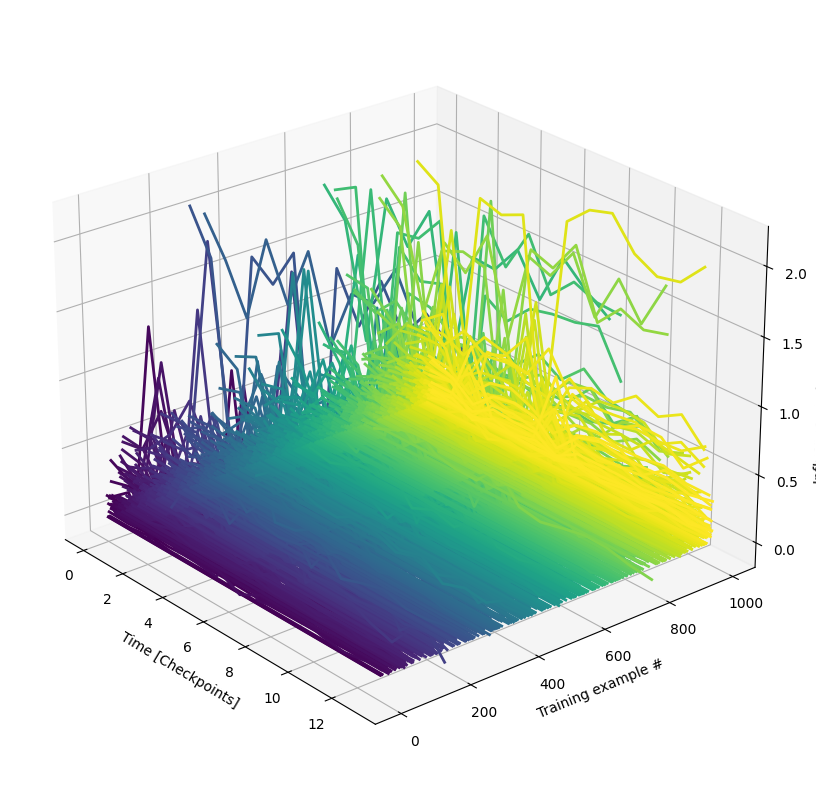

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
tensor = torch.bmm(t_flat, torch.transpose(t_flat, 1,2)).mean(1)[:, 0:10000]

x = np.arange(tensor.shape[0])  
y = np.arange(tensor.shape[1])


fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')

colors = cm.viridis(np.linspace(0, 1, tensor.shape[1]))
for i in range(tensor.shape[1]):  
    ax.plot(x, np.full_like(x, y[i]), tensor[:, i], color=colors[i], linewidth=2)


ax.set_xlabel('Time [Checkpoints]')
ax.set_ylabel('Training example #')
ax.set_zlabel('Influence at checkpoint')


ax.view_init(elev=25, azim=-40, roll=0)

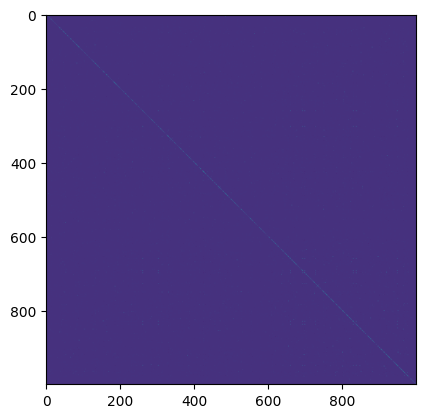

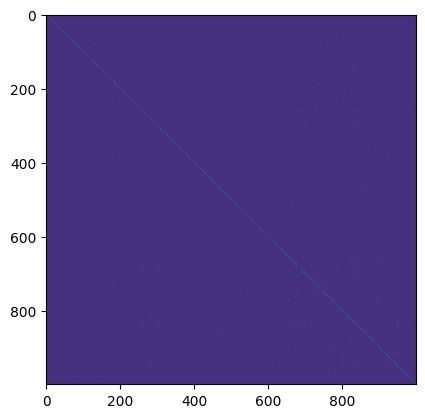

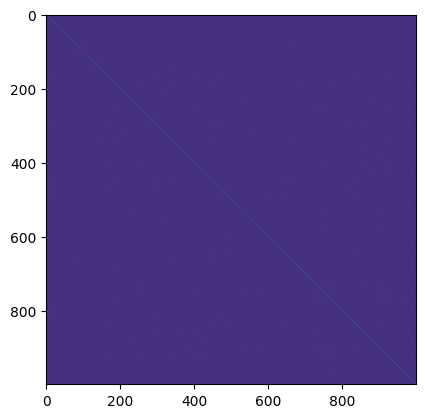

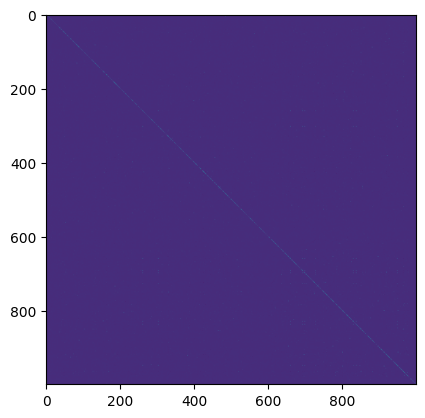

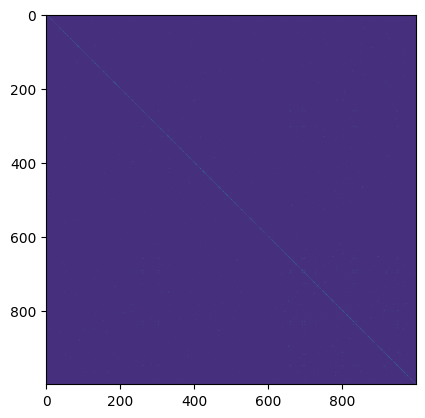

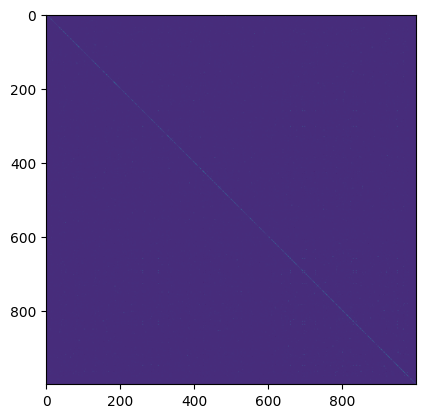

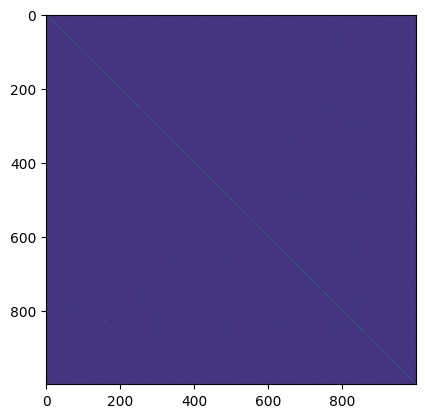

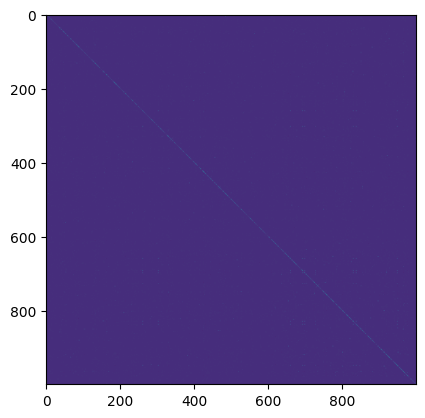

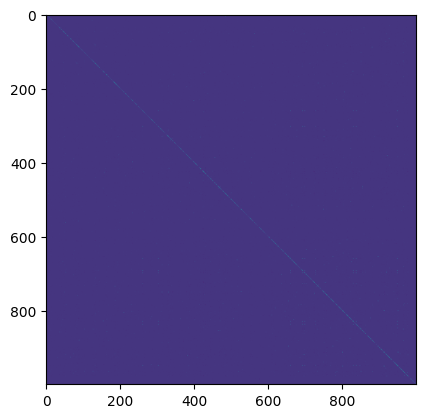

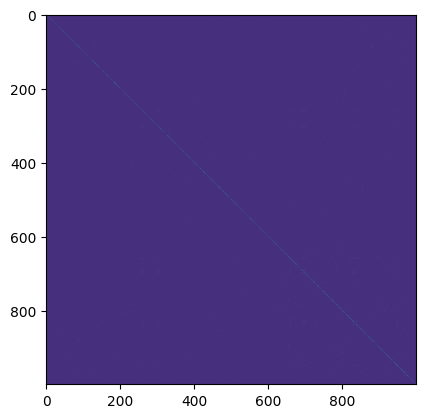

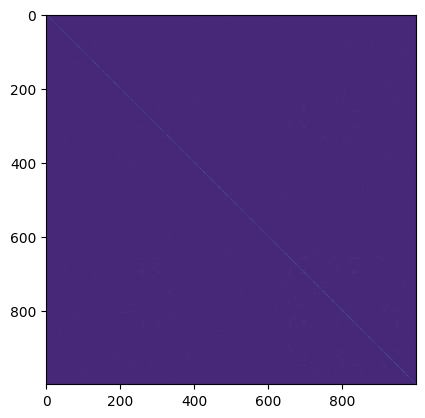

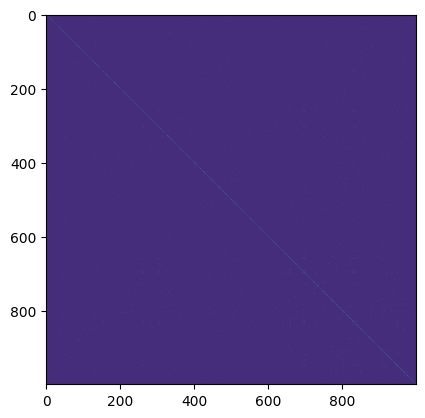

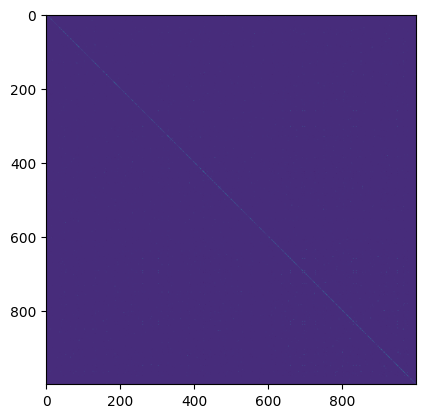

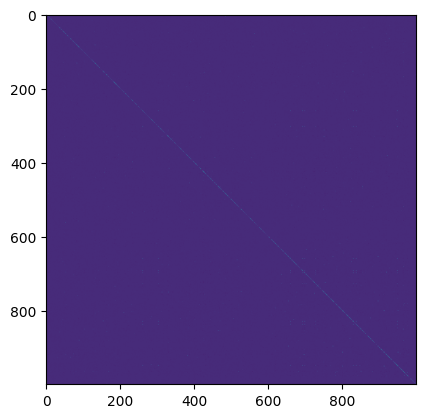

In [41]:

for i, inf in enumerate(torch.bmm(t_flat, torch.transpose(t_flat, 1,2))):
    plt.imshow(inf)
    plt.show()

In [42]:
np.einsum('ijkl,nolp->ijnokp', t_flat, t_flat.T)

/tmp/ipykernel_1315863/215811821.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3697.)
  np.einsum('ijkl,nolp->ijnokp', t_flat, t_flat.T)


ValueError: einstein sum subscripts string contains too many subscripts for operand 0

In [24]:
# # test_instance =  "Test <mask>"
# # training_examples = ["test", "is"]


# start = time.time()

# models = []
# influences_at_cps = []
# for checkpoint in tqdm(checkpoints, desc="Checkpoints"):
#   config = RobertaConfig.from_pretrained(checkpoint)
#   model = RobertaForMaskedLM(config=config)
#   influences_at_cps.append(pw_influence_at_cp(model, test_instance,training_examples["input_ids"]))
# end = time.time()
# print(datetime.timedelta(seconds=end - start))    
# influences_total = torch.stack(influences_at_cps).sum(dim=0)
# influences_total

In [25]:
torch.stack(influences_at_cps).T.shape

In [83]:
influences_total